# Pandas - Data Analysis with Python


Pandas is a high-performance, easy-to-use data structures and data analysis tools.

<img src="images/pandas.jpg" style="width: 500px;"/>

## What is it good for?

Working with (large) data sets and created automated data processes.

Pandas is extensively used to prepare data in data science (machine learning, data analytics, ...)

**Examples**: 
* **Import and export** data into standard formats (CSV, Excel, Latex, ..).
* Combine with Numpy for **advanced computations** or Matplotlib for **visualisations**.
* Calculate **statistics** and answer questions about the data, like
  * What's the average, median, max, or min of each column?
  * Does column A correlate with column B?
  * What does the distribution of data in column C look like?
* **Clean** up data (e.g. fill out missing information and fix inconsistent formatting) and **merge** multiple data sets into one common dataset.



## Some interesting data sources

### (Norsk) Statistisk sentralbyrå
https://www.ssb.no

Employment rates, immigration rates housing market, ...

<img src="images/ssb.png" style="width: 400px;"/>

### Finn API 
https://www.finn.no/api

Note: Unfortunately currently only open for business



### Oslo Bysykkel API
https://developer.oslobysykkel.no

Live usage data and statistics.

**!! This lecture will use this data.**

### Ruter API 
https://developer.entur.org

Travel planning and live departure information. For example live departure information 


<img src="images/raspberry_pi_project.jpg" style="width: 300px;"/>

(Credits: Malte Pliszewski)

### YR data
http://om.yr.no/verdata/free-weather-data/

### Financial and economic data
https://www.quandl.com/

### And lots lots more:

* Almost every "smart" device, internet of things, ...

## More information

* Official Pandas documentation: http://pandas.pydata.org/pandas-docs/stable/tutorials.html 
* Pandas cookbook: http://pandas.pydata.org/pandas-docs/stable/cookbook.html
* Wes McKinney, Python for Data Analysis 
![Python for Data Analysis](images/python_for_data_analysis.gif "Python for Data Analysis")

## Installation

* If you have Anaconda: Already installed
* If you have Miniconda: 
      conda install pandas
* If you have your another Python distribution: 
      pip install pandas --user

## Quick guide through Pandas


In [1]:
%matplotlib inline

First import pandas (and numpy) as usual.

In [1]:
import pandas as pd

import numpy as np

## The basic data structures of Pandas

<center>
<img src="https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png
" style="width: 500px;"/>
Figure: Fundamental data types in Pandas.
    (Image source: https://www.learndatasci.com)
</center>

### Series 

Series in Pands are 1-dimensional, axis-labeled array capable of holding any data type.

The simplest way to create a Series is from a list:

In [61]:
s1 = pd.Series([1, 3, 5, np.nan, 6, 8])
s1

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

* Pandas relies on numpy to store the underlying data. Note the dtype property that we already know from numpy. 
* If no dtype is specified, it chooses a stuitable dtype for your data. 

## Specifying the axis label

By default, the data is labeld by integers. This can be changed with:

In [62]:
s2 = pd.Series([1, 3, 5, np.nan, 6, 8], index=["a", "b", "c", "d", "e", "f"])
s2

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

# Time-series data

A common use-case is to have data labeled with time stamps (for instance sensor data).



In [64]:
dates = pd.date_range(start='20181023', end='20191023', periods=6)
dates

DatetimeIndex(['2018-10-23', '2019-01-04', '2019-03-18', '2019-05-30',
               '2019-08-11', '2019-10-23'],
              dtype='datetime64[ns]', freq=None)

In [6]:
s3 = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates)
s3

2018-10-23    1.0
2018-10-24    3.0
2018-10-25    5.0
2018-10-26    NaN
2018-10-27    6.0
2018-10-28    8.0
Freq: D, dtype: float64

# DataFrame

DataFrame's are 2-dimensional labeled data structure with columns of potentially different types.

The most basic method to create a DataFrame is from a dictionary:

In [75]:
data = {
    'apples': [3, 0, 0, 1],
    'pears':  [6, 1, 3, 5]
}

purchases = pd.DataFrame(data)
purchases

,apples,pears
0,3,6
1,0,1
2,0,3
3,1,5


**How did this work:** Each (key, value) pair in the dictionary is interpreted as a column in the data table. The key is used as column label.

As with Series, we can provide an index to label the y-axis:

In [105]:
data = {
    'apples': [3, 0, 0, 1],
    'pears':  [6, 1, 3, 2]
}
customers = ["Marie", "Jørgen", "Hilde", "Hans"]

purchases = pd.DataFrame(data, index=customers)
purchases

,apples,pears
Marie,3,6
Jørgen,0,1
Hilde,0,3
Hans,1,2


## Extracting columns from a DataTable

When **loc**ating (i.e. extracting) a column of a DataFrame, one obtains a `Series`

In [85]:
purchases.loc["Hans"]

apples    1
pears     2
Name: Hans, dtype: int64

In [89]:
type(purchases.loc["Hans"]) == pd.Series

True

## Combining two Series to a DataFrame 

In [96]:
s1 = pd.Series([1, 2], index=['A', 'B'])
s2 = pd.Series([3, 4], index=['A', 'B'])
pd.concat([s1, s2, s1], axis=1, sort=False)

,0,1,2
A,1,3,1
B,2,4,2


## Loading data from file

For pratical applications, we will read the data from a file rather from a dictionary. 

Pandas offers various drivers to load data in different formats:

In [97]:
pd.read_*?

We will see this in a real application in a moment.

# Data analysis on the Oslo Byskkel data 



<img src="https://cdn.sanity.io/images/23ukf9xm/production/4acf4a351c2174972b61465210f56878c41bad65-5698x3799.jpg?w=1200&h=600&fit=max" style="width: 500px;"/>



**Goal**: Perfrom data analysis of the bike usage, such as:
* Identify peak and low points of biek station usage (over a year, week or day)?
* Which are the most and least used bike stations?
* Which are the most and least used bike routes?
* Visualize the bike usage in Oslo.

## Step 1: Data aquisition and inspection

The monthly usage data can be downloaded here: https://developer.oslobysykkel.no/data. 


I downloaded the data from August to September 2016:

In [101]:
!ls -hl data/bysykkel/*.csv

-rw-r--r-- 1 simon simon 14M aug.  20 19:34 data/bysykkel/trips-2016.10.1-2016.10.31.csv
-rw-r--r-- 1 simon simon 21M aug.  20 19:34 data/bysykkel/trips-2016.8.1-2016.8.31.csv
-rw-r--r-- 1 simon simon 22M aug.  20 19:34 data/bysykkel/trips-2016.9.1-2016.9.30.csv


Let's inspect the content of one of these files:

In [13]:
!head data/bysykkel/trips-2016.10.1-2016.10.31.csv

Start station,Start time,End station,End time
283,2016-10-01 06:00:08 +0200,238,2016-10-01 06:09:47 +0200
169,2016-10-01 06:00:41 +0200,175,2016-10-01 06:11:07 +0200
211,2016-10-01 06:01:02 +0200,162,2016-10-01 06:15:52 +0200
200,2016-10-01 06:01:20 +0200,163,2016-10-01 06:15:04 +0200
157,2016-10-01 06:02:16 +0200,163,2016-10-01 06:04:29 +0200
177,2016-10-01 06:04:22 +0200,179,2016-10-01 06:24:40 +0200
257,2016-10-01 06:04:39 +0200,199,2016-10-01 06:16:09 +0200
191,2016-10-01 06:05:54 +0200,191,2016-10-01 06:06:21 +0200
191,2016-10-01 06:06:01 +0200,167,2016-10-01 06:15:40 +0200


## Loading the data into a DataFrame

Since this is a comma seperated file, we can use Panda's `read_csv` function:

In [107]:
trips = pd.read_csv('data/bysykkel/trips-2016.10.1-2016.10.31.csv', 
                    sep=',')

The result is stored in  a `DataFrame` object. The first row of the csv was used as column labels.

In [108]:
trips

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200
1,169,2016-10-01 06:00:41 +0200,175.0,2016-10-01 06:11:07 +0200
2,211,2016-10-01 06:01:02 +0200,162.0,2016-10-01 06:15:52 +0200
3,200,2016-10-01 06:01:20 +0200,163.0,2016-10-01 06:15:04 +0200
4,157,2016-10-01 06:02:16 +0200,163.0,2016-10-01 06:04:29 +0200
5,177,2016-10-01 06:04:22 +0200,179.0,2016-10-01 06:24:40 +0200
6,257,2016-10-01 06:04:39 +0200,199.0,2016-10-01 06:16:09 +0200
7,191,2016-10-01 06:05:54 +0200,191.0,2016-10-01 06:06:21 +0200
8,191,2016-10-01 06:06:01 +0200,167.0,2016-10-01 06:15:40 +0200
9,181,2016-10-01 06:06:13 +0200,251.0,2016-10-01 06:18:34 +0200


We can use the `head` and `tail` functions to only show the (by default 5) top rows in the data table.

In [110]:
trips.head(5)

,Start station,Start time,End station,End time
0,283,2016-10-01 06:00:08 +0200,238.0,2016-10-01 06:09:47 +0200
1,169,2016-10-01 06:00:41 +0200,175.0,2016-10-01 06:11:07 +0200
2,211,2016-10-01 06:01:02 +0200,162.0,2016-10-01 06:15:52 +0200
3,200,2016-10-01 06:01:20 +0200,163.0,2016-10-01 06:15:04 +0200
4,157,2016-10-01 06:02:16 +0200,163.0,2016-10-01 06:04:29 +0200


## Fixing columns types

Pandas tries to **automatically detect the type** of a column:

In [111]:
trips.dtypes

Start station      int64
Start time        object
End station      float64
End time          object
dtype: object

We can see that this **automatic detection failed** for:

* `Start time`:  should be a date
* `End time`:  should be a date
* `End station`:  should be a integer

## Fixing  start and end times

In order to be able to sort or filter by date, we need to tell Pandas that this column should be parsed as dates. We can do this directly when loading in the data: 

In [47]:
trips = pd.read_csv('data/bysykkel/trips-2016.10.1-2016.10.31.csv', 
                               sep=',', 
                               parse_dates=['Start time', 'End time'],
                               date_parser=lambda col: pd.to_datetime(col, utc=True)
                         )

**Note!**  The lambda function is necessary to read dates with mixed time-zones!

In [48]:
trips.dtypes

Start station                  int64
Start time       datetime64[ns, UTC]
End station                  float64
End time         datetime64[ns, UTC]
dtype: object

In [49]:
trips.head()

,Start station,Start time,End station,End time
0,283,2016-10-01 04:00:08+00:00,238.0,2016-10-01 04:09:47+00:00
1,169,2016-10-01 04:00:41+00:00,175.0,2016-10-01 04:11:07+00:00
2,211,2016-10-01 04:01:02+00:00,162.0,2016-10-01 04:15:52+00:00
3,200,2016-10-01 04:01:20+00:00,163.0,2016-10-01 04:15:04+00:00
4,157,2016-10-01 04:02:16+00:00,163.0,2016-10-01 04:04:29+00:00


### Fixing end station

We expected `End station` to be of type `np.int64`. We can enforce this with:

In [51]:
trips = pd.read_csv('data/bysykkel/trips-2016.10.1-2016.10.31.csv', 
                    sep=',', 
                    parse_dates=['Start time', 'End time'],
                    date_parser=lambda col: pd.to_datetime(col, utc=True),
                    dtype={"End station": np.int64}
                    )

ValueError: Integer column has NA values in column 2

**Conclusion**: 
`End station` contains `Not a Number` values or`NaN` values, which can be represented in the `float` datatype, but not in the `int` datatype

In [64]:
trips.sort_values("End station").tail()

,Start station,Start time,End station,End time
107496,233,2016-10-12 19:05:32+00:00,NaN,2016-10-17 05:56:12+00:00
117359,267,2016-10-13 20:55:38+00:00,NaN,2016-10-14 09:43:21+00:00
153782,232,2016-10-19 06:08:40+00:00,NaN,2016-10-20 05:42:02+00:00
200309,158,2016-10-25 17:22:32+00:00,NaN,2016-10-25 18:02:16+00:00
235053,192,2016-10-30 15:01:47+00:00,NaN,2016-10-31 10:40:41+00:00


# Selecting data from dataframes

## Selecting columns


There are three main ways to select columns from a DataTable:

* The indexing notation [].
* The .loc function
* The .iloc function.

## Selecting columns with the index notation

Use the index notation if you know the name of the column(s) that you want to extract.

If you use a single column, the result is a Series:

In [66]:
trips['Start time'].head()

0   2016-10-01 04:00:08+00:00
1   2016-10-01 04:00:41+00:00
2   2016-10-01 04:01:02+00:00
3   2016-10-01 04:01:20+00:00
4   2016-10-01 04:02:16+00:00
Name: Start time, dtype: datetime64[ns, UTC]

Multiple columns are selected by indexing with a list of column titles. The result is a DataFrame:

In [69]:
trips[['Start time', 'End time']].head()

,Start time,End time
0,2016-10-01 04:00:08+00:00,2016-10-01 04:09:47+00:00
1,2016-10-01 04:00:41+00:00,2016-10-01 04:11:07+00:00
2,2016-10-01 04:01:02+00:00,2016-10-01 04:15:52+00:00
3,2016-10-01 04:01:20+00:00,2016-10-01 04:15:04+00:00
4,2016-10-01 04:02:16+00:00,2016-10-01 04:04:29+00:00


### Selecting rows and columns 

`loc`  a more explicit alternative for selecting rows and/or columns

**Syntax**: `DataFrame.loc[ROWS, COLUMNS]`

In [93]:
trips.loc[[1, 4, 5], ['Start time','End time']]

,Start time,End time
1,2016-10-01 04:00:41+00:00,2016-10-01 04:11:07+00:00
4,2016-10-01 04:02:16+00:00,2016-10-01 04:04:29+00:00
5,2016-10-01 04:04:22+00:00,2016-10-01 04:24:40+00:00


Use the : notation to select ranges of columns/rows.

### Selecting rows and columns based on indices

`iloc` is the same is `loc` but expectes the index positions instead of column names (i.e. always uses intergers)

**Syntax**: `DataFrame.iloc[ROWS, COLUMNS]`

In [101]:
trips.iloc[:5, 0:2]

,Start station,Start time
0,283,2016-10-01 04:00:08+00:00
1,169,2016-10-01 04:00:41+00:00
2,211,2016-10-01 04:01:02+00:00
3,200,2016-10-01 04:01:20+00:00
4,157,2016-10-01 04:02:16+00:00


### Plotting

We can use the `plot` class method to plot our data table:

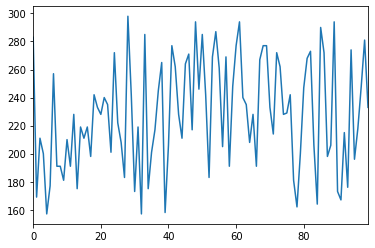

In [29]:
bike_stats_types['Start station'].head(100).plot()

Pandas uses the index as the x-axis.

Passing multiple columns results in multiple plot lines

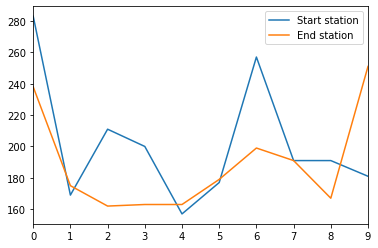

In [30]:
data = bike_stats_types[['Start station', 'End station']].head(10)
data.plot()

In order to get a more meaningful x-axis, we can select a column to be used as the x-axis:

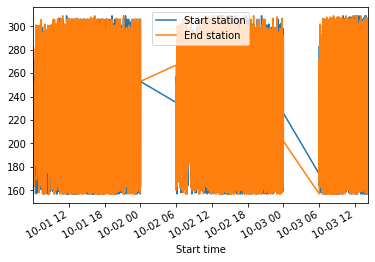

In [31]:
bike_stats_types.head(20000).plot(x='Start time', 
                                  y=['Start station', 'End station'])

The documentation of plot reveils many more plotting options:

In [32]:
bike_stats_types.plot?

For example, let's create a bar plot:

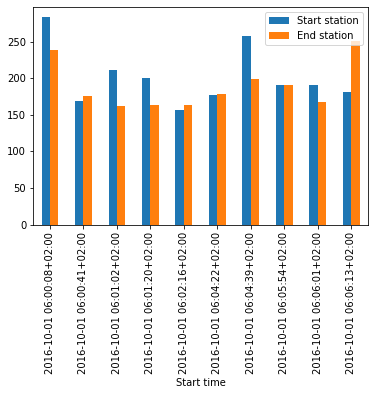

In [33]:
bike_stats_types.head(10).plot(x='Start time', y=['Start station', 'End station'], kind='bar')

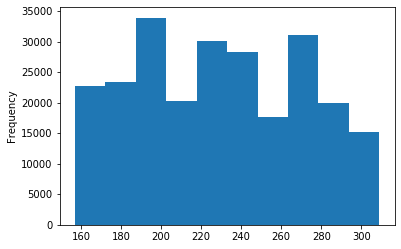

In [34]:
bike_stats_types['Start station'].plot(kind='hist')

### Saving data 

Panda tables can be written out to various formats. For exporting to a spreadsheet compatible format (e.g. Excel), you can export as CSV file: 

In [35]:
bike_stats_types[['Start station', 'End station']].head(10).to_csv()

',Start station,End station\n0,283,238.0\n1,169,175.0\n2,211,162.0\n3,200,163.0\n4,157,163.0\n5,177,179.0\n6,257,199.0\n7,191,191.0\n8,191,167.0\n9,181,251.0\n'

Pandas can also be useful to automatically generate Latex tables: 

Write the string (potentially after some post-processing) to a file in order to use it in your project:

In [36]:
with open('table.tex', 'w') as file:
    file.write(data.to_latex())

Compile `table_main.tex` file to see the result!

## Some first data analysis: What are the top ten bike stations?

**Approach**: For each bike station usage, the station's `id` occurs in a new row in the `Start station` column. 
In order to find how often a bike station is used, we count how often the station id occurs in the `Start station` column. By sorting these counds from high to low, we get the most used bike stations. 

The function `value_counts` does exactly what we need:

In [37]:
bike_stats['Start station'].value_counts()[:10]   # This is a pd.Series

233    7832
267    6713
222    5221
294    4513
181    4440
277    4345
191    4325
253    4278
195    3986
196    3911
Name: Start station, dtype: int64

Let's plot the result in the bar chart:

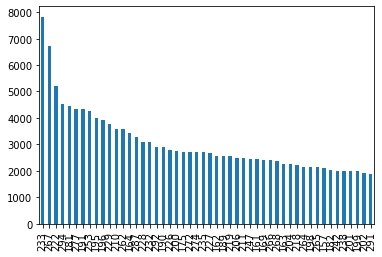

In [38]:
bike_stats['Start station'].value_counts()[:50].plot(kind='bar')

## Concatenating DataFrames

The data so far only contained the statistics for October 2016:

In [39]:
bike_stats_types["Start time"].min(), bike_stats_types["Start time"].max()

(datetime.datetime(2016, 10, 1, 6, 0, 8, tzinfo=tzoffset(None, 7200)),
 datetime.datetime(2016, 10, 31, 23, 59, 10, tzinfo=tzoffset(None, 3600)))

Let us load the data for September 2016:

In [40]:
bike_stats_september = pd.read_csv('data/bysykkel/trips-2016.9.1-2016.9.30.csv', sep=',', parse_dates=['Start time', 'End time'])

To concatenate the two, we use the `concat` function:

In [41]:
bike_stats_sep_oct = pd.concat((bike_stats_september, bike_stats_types))

**Note**: Altnerative you can append data with:
```
bike_stats_sep_oct = bike_stats_september.append(bike_stats_types)
```

Let's check that we indeed have the full range:

In [42]:
bike_stats_sep_oct["Start time"].min(), bike_stats_sep_oct["Start time"].max()

(Timestamp('2016-09-01 06:00:02+0200', tz='pytz.FixedOffset(120)'),
 datetime.datetime(2016, 10, 31, 23, 59, 10, tzinfo=tzoffset(None, 3600)))

# Linking multiple tables

At the moment, the bike stations are anonymous ids. It would be usefull to have additional meta-data (location name, GPS coordinates, ...) attached. 

Luckily we have a file that contains this information:

In [43]:
!python3 -m json.tool data/bysykkel/stations.json

{
    "stations": [
        {
            "id": 157,
            "in_service": true,
            "title": "Nylandsveien",
            "subtitle": "mellom Norbygata og Urtegata",
            "number_of_locks": 30,
            "center": {
                "latitude": 59.91562,
                "longitude": 10.762248
            },
            "bounds": [
                {
                    "latitude": 59.915418602160436,
                    "longitude": 10.762068629264832
                },
                {
                    "latitude": 59.91565254992276,
                    "longitude": 10.762672126293182
                },
                {
                    "latitude": 59.915807169665264,
                    "longitude": 10.762433409690855
                },
                {
                    "latitude": 59.91557994562126,
                    "longitude": 10.761821866035461
                },
                {
                    "latitude": 59.915418602160436,
               

The obvious thing would be to use `pd.read_json`, but this does not work because it expects the json to be in a certain format.

In [44]:
# bike_stations = pd.read_json('data/bysykkel/stations')

Instead we load the data with the `json` module:

In [45]:
import json
json_stations = json.load(open('data/bysykkel/stations.json', 'r'))
json_stations

{'stations': [{'id': 157,
   'in_service': True,
   'title': 'Nylandsveien',
   'subtitle': 'mellom Norbygata og Urtegata',
   'number_of_locks': 30,
   'center': {'latitude': 59.91562, 'longitude': 10.762248},
   'bounds': [{'latitude': 59.915418602160436,
     'longitude': 10.762068629264832},
    {'latitude': 59.91565254992276, 'longitude': 10.762672126293182},
    {'latitude': 59.915807169665264, 'longitude': 10.762433409690855},
    {'latitude': 59.91557994562126, 'longitude': 10.761821866035461},
    {'latitude': 59.915418602160436, 'longitude': 10.762068629264832}]},
  {'id': 158,
   'in_service': True,
   'title': 'Bentsebrugata',
   'subtitle': 'rett over busstoppet',
   'number_of_locks': 24,
   'center': {'latitude': 59.939228, 'longitude': 10.75917},
   'bounds': [{'latitude': 59.93914016847159, 'longitude': 10.758990666291977},
    {'latitude': 59.93914016847159, 'longitude': 10.759349333708023},
    {'latitude': 59.939319831528415, 'longitude': 10.759349333708023},
    {'

We are interested in the node `stations`, so let's extract this:

In [46]:
station_json = json_stations['stations']
station_json

[{'id': 157,
  'in_service': True,
  'title': 'Nylandsveien',
  'subtitle': 'mellom Norbygata og Urtegata',
  'number_of_locks': 30,
  'center': {'latitude': 59.91562, 'longitude': 10.762248},
  'bounds': [{'latitude': 59.915418602160436, 'longitude': 10.762068629264832},
   {'latitude': 59.91565254992276, 'longitude': 10.762672126293182},
   {'latitude': 59.915807169665264, 'longitude': 10.762433409690855},
   {'latitude': 59.91557994562126, 'longitude': 10.761821866035461},
   {'latitude': 59.915418602160436, 'longitude': 10.762068629264832}]},
 {'id': 158,
  'in_service': True,
  'title': 'Bentsebrugata',
  'subtitle': 'rett over busstoppet',
  'number_of_locks': 24,
  'center': {'latitude': 59.939228, 'longitude': 10.75917},
  'bounds': [{'latitude': 59.93914016847159, 'longitude': 10.758990666291977},
   {'latitude': 59.93914016847159, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longitude': 10.759349333708023},
   {'latitude': 59.939319831528415, 'longit

We can now use the `pandas.io.json_normalize` function to read in the entire dataset:

In [47]:
stations = pd.io.json.json_normalize(station_json)
stations

,id,in_service,title,subtitle,number_of_locks,bounds,center.latitude,center.longitude
0,157,True,Nylandsveien,mellom Norbygata og Urtegata,30,"[{'latitude': 59.915418602160436, 'longitude':...",59.915620,10.762248
1,158,True,Bentsebrugata,rett over busstoppet,24,"[{'latitude': 59.93914016847159, 'longitude': ...",59.939228,10.759170
2,159,True,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,21,"[{'latitude': 59.93915186056247, 'longitude': ...",59.939238,10.774279
3,160,True,Sjøsiden vest,nærmest fontenen,25,"[{'latitude': 59.9101839259445, 'longitude': 1...",59.910215,10.751687
4,161,True,St. Hanshaugen park vest,ved busstoppet Colletts gate,20,"[{'latitude': 59.926781168471585, 'longitude':...",59.926872,10.738456
5,162,True,Arkitekt Rivertz Plass,i Uelands gate,30,"[{'latitude': 59.934793030994975, 'longitude':...",59.934934,10.749475
6,163,True,Vaterlandsparken,langs Brugata,42,"[{'latitude': 59.91336409351895, 'longitude': ...",59.913409,10.757370
7,164,True,Vår Frelsers gravlund sør,langs Ullevålsveien,18,"[{'latitude': 59.91937801304554, 'longitude': ...",59.919530,10.743836
8,167,True,Pilestredet Park Studenthus,ved Stensberggata,18,"[{'latitude': 59.920604057407466, 'longitude':...",59.920565,10.734274
9,169,True,Bogstadveien,ved Sporveisgata,18,"[{'latitude': 59.92461258365721, 'longitude': ...",59.924729,10.724579


## Setting the index

Before extracting data from the `DataFrame`, it is good practice to assign a column with unique values as the index of the dataframe (if possible). For the stations DataFrame, the `id` column is a good choice:

In [48]:
stations = stations.set_index('id')
stations

,in_service,title,subtitle,number_of_locks,bounds,center.latitude,center.longitude
id,,,,,,,
157,True,Nylandsveien,mellom Norbygata og Urtegata,30,"[{'latitude': 59.915418602160436, 'longitude':...",59.915620,10.762248
158,True,Bentsebrugata,rett over busstoppet,24,"[{'latitude': 59.93914016847159, 'longitude': ...",59.939228,10.759170
159,True,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,21,"[{'latitude': 59.93915186056247, 'longitude': ...",59.939238,10.774279
160,True,Sjøsiden vest,nærmest fontenen,25,"[{'latitude': 59.9101839259445, 'longitude': 1...",59.910215,10.751687
161,True,St. Hanshaugen park vest,ved busstoppet Colletts gate,20,"[{'latitude': 59.926781168471585, 'longitude':...",59.926872,10.738456
162,True,Arkitekt Rivertz Plass,i Uelands gate,30,"[{'latitude': 59.934793030994975, 'longitude':...",59.934934,10.749475
163,True,Vaterlandsparken,langs Brugata,42,"[{'latitude': 59.91336409351895, 'longitude': ...",59.913409,10.757370
164,True,Vår Frelsers gravlund sør,langs Ullevålsveien,18,"[{'latitude': 59.91937801304554, 'longitude': ...",59.919530,10.743836
167,True,Pilestredet Park Studenthus,ved Stensberggata,18,"[{'latitude': 59.920604057407466, 'longitude':...",59.920565,10.734274


The index will be used, e.g. for row labels when plotting:

/home/simon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


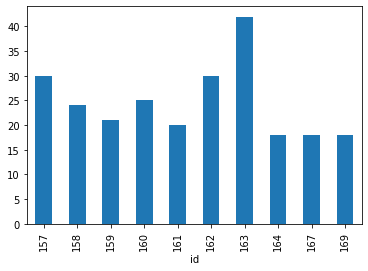

In [49]:
stations.head(10)["number_of_locks"].plot("bar")

### Removing columns from DataFrames

Some of the columns are not so usefull. We can remove columns from a DataFrame with:
```python
Dataframe.drop([Column Name or list], axis=1)
```
Lets reduce our stations to the usefull columns:

In [50]:
stations = stations.drop(["bounds", "subtitle"], axis=1)   # axis=0 drops rows
stations.head()

,in_service,title,number_of_locks,center.latitude,center.longitude
id,,,,,
157,True,Nylandsveien,30,59.915620,10.762248
158,True,Bentsebrugata,24,59.939228,10.759170
159,True,Hans Nielsen Hauges plass,21,59.939238,10.774279
160,True,Sjøsiden vest,25,59.910215,10.751687
161,True,St. Hanshaugen park vest,20,59.926872,10.738456


Further, we can extract a part of our `DataFrame` with 
```python
DataFrame.loc[startrow:endrow,startcolumn:endcolumn]
```
So for example if we are interested in the GPS positions for the stations with id 130-140 we use:

In [51]:
stations.loc[160:170, "center.latitude":"center.longitude"]

,center.latitude,center.longitude
id,,
160,59.910215,10.751687
161,59.926872,10.738456
162,59.934934,10.749475
163,59.913409,10.757370
164,59.919530,10.743836
167,59.920565,10.734274
169,59.924729,10.724579
170,59.930603,10.714784


We can use mathematical functions such as `min`, `max` or `mean` to get some information about a column:

In [52]:
print("min number of locks:  {}".format(stations["number_of_locks"].min()))
print("max number of locks:  {}".format(stations["number_of_locks"].max()))
print("mean number of locks: {}".format(stations["number_of_locks"].mean()))

min number of locks:  6
max number of locks:  48
mean number of locks: 22.29230769230769


Further, we can use `where` statments to find rows that satisfy certain conditions: 

In [53]:
large_stations = stations[stations["number_of_locks"] > 30]
#large_stations

In [54]:
len(large_stations), len(stations)

(20, 130)

## Plotting maps

It would be nice to plot the stations in a Google Maps map. We use the module `gmplot` for this:

In [55]:
import gmplot

gmap = gmplot.GoogleMapPlotter(59.915620, 10.762248, zoom=12)
gmap.draw("mymap.html")

We can now open up the `mymap.html` with our favorite browser, or simply in the IPython notebook:

In [56]:
# Show the plot
from IPython.display import IFrame
IFrame('mymap.html', width=700, height=350)

Next, we extract the stations longtitude, latitude and location tile: 

In [57]:
stations[["center.latitude", "center.longitude"]].head()

,center.latitude,center.longitude
id,,
157,59.915620,10.762248
158,59.939228,10.759170
159,59.939238,10.774279
160,59.910215,10.751687
161,59.926872,10.738456


In [58]:
stations["center.latitude"].values

array([59.91562 , 59.939228, 59.939238, 59.910215, 59.926872, 59.934934,
       59.913409, 59.91953 , 59.920565, 59.924729, 59.930603, 59.928912,
       59.916847, 59.926205, 59.912504, 59.929562, 59.91565 , 59.929838,
       59.925065, 59.913015, 59.937737, 59.946699, 59.93536 , 59.919827,
       59.912558, 59.903467, 59.929034, 59.921791, 59.917879, 59.914326,
       59.903178, 59.914036, 59.92841 , 59.929529, 59.922704, 59.914654,
       59.91499 , 59.908184, 59.912647, 59.922532, 59.910287, 59.907681,
       59.923729, 59.91645 , 59.928005, 59.925622, 59.912779, 59.923191,
       59.935065, 59.920206, 59.94036 , 59.932779, 59.920187, 59.917212,
       59.910137, 59.932304, 59.922414, 59.935903, 59.920944, 59.924852,
       59.925276, 59.920383, 59.922044, 59.949246, 59.915389, 59.92805 ,
       59.913731, 59.922483, 59.914052, 59.93362 , 59.91564 , 59.924337,
       59.919343, 59.919016, 59.911411, 59.915471, 59.904441, 59.922327,
       59.910091, 59.931834, 59.904068, 59.931524, 

And add it to our plot:

In [59]:
from insertapikey import insertapikey
gmap.scatter(stations["center.latitude"].values, stations["center.longitude"].values, size=10, marker=True)
gmap.draw("mymap_with_stations.html")
insertapikey("mymap_with_stations.html")
#IFrame('mymap_with_stations.html', width=700, height=350)

SyntaxError: invalid syntax (insertapikey.py, line 12)

In [ ]:
#!google-chrome mymap_with_stations.html

# Merging Panda objects

So far our bike statistics stores the bike stations as abstract integers:


In [ ]:
bike_stats_sep_oct.head()

Wouldn't it be nice to add the station information? We achieve this by merging the information in the `stations` DataFrame into the `bike_stats_sep_oct` DataFrame. The syntax for merging two tables with the most important arguments is:

```python
pd.merge(left, right, how='inner', left_on=None, right_on=None)
```         
The arguments mean the following:
* `left`: A DataFrame object
* `right`: Another DataFrame object
* `left_on`: Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `right_on`: Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame
* `how`: One of 'left', 'right', 'outer', 'inner'. Defaults to inner. See below for more detailed description of each method:



<img src="http://www.dofactory.com/Images/sql-joins.png" style="width: 300px;"/>

###  A simple demo on merging

In [ ]:
mystations = pd.DataFrame({'StationID': [5, 6, 7], 
                           'Name': ['Oppsal', 'Frogner', 'Majorstuen']})
mystations

In [ ]:
mytrips = pd.DataFrame({'StartStationID': [6, 5, 8],
                        'StartTime': ["6:00", "14:30", "8:45"]})
mytrips

In [ ]:
pd.merge(mytrips, mystations, how='inner', left_on="StartStationID", right_on="StationID")

### Back to the Oslo BySykkel example

Let's try it out. First, lets check the names of our columns again:

In [ ]:
print(bike_stats_sep_oct.dtypes)

In [ ]:
print(stations.dtypes)

We want to merge in the columns `bike_stats_sep_oct["Start station"]` with the index for `stations`. We merge call is therefore:

In [ ]:
merged_bike_stats = pd.merge(bike_stats_sep_oct, stations, how='left', left_on="Start station", right_index=True)
merged_bike_stats

Let's check that we still have all the data rows:

In [ ]:
print(len(merged_bike_stats))
print(len(bike_stats_sep_oct))

Wohooo!

Let us do the same for `End station`. To avoid overlapping column names, we use the `suffices`:

In [ ]:
merged_bike_stats2 = pd.merge(merged_bike_stats, stations, how='left', left_on="End station", 
                              right_index=True, suffixes=("_start", "_end"))
merged_bike_stats2

## What are the busiest stations?

Let's first find the busiest station:

In [ ]:
busy_station = merged_bike_stats2['Start station'].value_counts()[:5]
busy_station

In [ ]:
stations.loc[busy_station.index]

### What is the usage pattern of the busiest station?

Filter out all trips starting from the bussiest station

In [ ]:
ak_plass_stats = merged_bike_stats[merged_bike_stats["Start station"] == busy_station.index[0]]
ak_plass_stats.head()

Plot the results:

In [ ]:
resampled_trips = pd.DataFrame({"Counter": 1}, 
                                index=ak_plass_stats["Start time"])
resampled_trips.head()

In [ ]:
resampled_trips = resampled_trips.resample('30T').sum()   # resample every 30 minutes and sum results
resampled_trips.head()

In [ ]:
resampled_trips.loc["2016-09-01 04:00:00":"2016-09-03 04:00:00"].plot(y=['Counter'])